<a href="https://colab.research.google.com/github/poojajangid19/Data-Analyst/blob/main/Pandas_5_Titanic_Dataset_play_around_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Overview of the Titanic Dataset

The Titanic dataset includes demographics and passenger information from 891 of the 2,224 passengers and crew on board the Titanic.

### Key Features in the Dataset

The dataset includes several features that are commonly used to predict survival rates:

- **PassengerId**: An identifier for each traveler.
- **Survived**: Indicates if a passenger survived or not (0 = No, 1 = Yes).
- **Pclass**: Ticket class, a proxy for socio-economic status (1 = 1st, 2 = 2nd, 3 = 3rd).
- **Name**: The name of the passenger.
- **Sex**: The passenger's gender.
- **Age**: The passenger's age in years.
- **SibSp**: The number of siblings or spouses the passenger had aboard the Titanic.
- **Parch**: The number of parents or children the passenger had aboard the Titanic.
- **Ticket**: Ticket number.
- **Fare**: Passenger fare.
- **Cabin**: Cabin number.
- **Embarked**: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

### Challenges

The dataset poses several challenges:
- Handling missing data, especially for the 'Age' and 'Cabin' features.
- Deciding how to encode categorical variables.
- Creating meaningful new features from existing data, such as deriving titles from names, which might give clues about the social status, age, and therefore survival probability.
- Balancing the model's complexity with its accuracy.

### Part 1: Basic DataFrame Operations


Dataset:

https://github.com/adamerose/datasets/blob/master/titanic.csv

In [8]:
# Import pandas
import pandas as pd


#### Viewing Data
df = pd.read_csv('titanic.csv')

# Display the first few rows of the DataFrame
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# Display the last few rows of the DataFrame
df.tail(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.500,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [11]:
# checking index

df.index


RangeIndex(start=0, stop=891, step=1)

In [10]:
df_col = df.columns
print(df_col)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [13]:
# checking shape

df.shape
# rows, columns

(891, 15)

In [20]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# Get concise summary of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


### Part 2: Accessing Data


In [23]:
#### Selecting Columns

# Select a single column as a Series
series = df['survived']
series

,survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [24]:
type(series)

pandas.core.series.Series

In [25]:
series.ndim

1

In [31]:
# Select multiple columns
subset = df[['alive','age','sex']]
subset

,alive,age,sex
0,no,22.0,male
1,yes,38.0,female
2,yes,26.0,female
3,yes,35.0,female
4,no,35.0,male
...,...,...,...
886,no,27.0,male
887,yes,19.0,female
888,no,NaN,female
889,yes,26.0,male


In [ ]:
subset.ndim

2

In [35]:
# Selecting rows

df[:78 ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0,3,male,26.0,1,0,14.4542,C,Third,man,True,NaN,Cherbourg,no,False
74,1,3,male,32.0,0,0,56.4958,S,Third,man,True,NaN,Southampton,yes,True
75,0,3,male,25.0,0,0,7.6500,S,Third,man,True,F,Southampton,no,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
# Accessing using loc method
## Access a group of rows and columns by label(s) or a boolean array.
df.loc[1:4, ['survived', 'pclass', 'sex']]

,survived,pclass,sex
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


In [40]:
loc_way = df.loc[:, 'sex']
type(loc_way)
indexing_way = df['sex']
type(indexing_way)

pandas.core.series.Series

In [41]:
df.iloc[1:4, [1,3, 4]]

,pclass,age,sibsp
1,1,38.0,1
2,3,26.0,0
3,1,35.0,1


In [ ]:
df.iloc[:5, :5]

,PassengerId,Survived,Pclass,Name,Sex
0,1,0,3,"Braund, Mr. Owen Harris",male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,1,3,"Heikkinen, Miss. Laina",female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,5,0,3,"Allen, Mr. William Henry",male


In [42]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# index no 2, Heikkinen, Miss. Laina, Gender and age

In [43]:
df.loc[2, ["embarked", "age", "sex"]]

,2
embarked,S
age,26.0
sex,female


In [ ]:
df.iloc[2, [3,4,5]]

Name    Heikkinen, Miss. Laina
Sex                     female
Age                       26.0
Name: 2, dtype: object

#### Pandas Series Concepts

In [44]:
# Extract the 'Age' column into a Series
age_series = df['age']

# Display the first few entries
age_series.head()

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [45]:
print(age_series.dtype)  # Prints the data type of the series
print(age_series.index)  # Prints the index of the series
print(age_series.shape)  # Prints the shape of the series


float64
RangeIndex(start=0, stop=891, step=1)
(891,)


In [46]:
print(age_series.describe())  # Summary statistics for the 'Age' series


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


In [48]:
# Access the first element by position
print(age_series.iloc[0])

# Access elements by label (index)
print(age_series.loc[0:10])  # Slicing to get the first 11 elements


22.0
0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
Name: age, dtype: float64


In [50]:
age_col = df['age']
age_col>30

,age
0,False
1,True
2,False
3,True
4,True
...,...
886,False
887,False
888,False
889,False


In [51]:
age_col[age_col>30]

,age
1,38.0
3,35.0
4,35.0
6,54.0
11,58.0
...,...
873,47.0
879,56.0
881,33.0
885,39.0


In [53]:
# Filter to find ages greater than 18
age_series = df['age']
adult_ages = age_series[age_series > 18]
print(adult_ages.head())

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64


In [55]:
# Filter to find ages greater than 18
# Select 'age' and 'sex' columns first
age_sex_df = df[['age', 'sex']]

# Now I'll filter based on condition for 'age'
adult_ages_and_sex = age_sex_df[age_sex_df['age'] > 18]
print(adult_ages_and_sex.head())

    age     sex
0  22.0    male
1  38.0  female
2  26.0  female
3  35.0  female
4  35.0    male


# **Continue from here**

In [56]:
# Q1: Filter and show all passengers who survived.


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [67]:
# Q2: Display all female passengers who were in third class.
female_3rdclass = df[ (df['sex'] == 'woman' ) & (df['class'] == 'first')]
female_3rdclass

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [66]:
# Q3: Identify passengers who embarked from Southampton (S) and paid a fare greater than $50.

embarked_s_fare_50 = df[(df['embarked'] == 'S') & (df['fare'] > 50)]
print(embarked_s_fare_50)

     survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
3           1       1  female  35.0      1      0   53.1000        S  First   
6           0       1    male  54.0      0      0   51.8625        S  First   
27          0       1    male  19.0      3      2  263.0000        S  First   
35          0       1    male  42.0      1      0   52.0000        S  First   
62          0       1    male  45.0      1      0   83.4750        S  First   
..        ...     ...     ...   ...    ...    ...       ...      ...    ...   
846         0       3    male   NaN      8      2   69.5500        S  Third   
856         1       1  female  45.0      1      1  164.8667        S  First   
863         0       3  female   NaN      8      2   69.5500        S  Third   
867         0       1    male  31.0      0      0   50.4958        S  First   
871         1       1  female  47.0      1      1   52.5542        S  First   

       who  adult_male deck  embark_town alive  alo

In [69]:
# Q4: List all passengers who were minors (under 18 years old) traveling alone (without siblings or parents).

pass_sibsp_18_alone = df[(df['age'] < 18) & (df['sibsp'] == 0) & (df['parch'] == 0)]
print(pass_sibsp_18_alone)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
14          0       3  female  14.0      0      0   7.8542        S   Third   
22          1       3  female  15.0      0      0   8.0292        Q   Third   
84          1       2  female  17.0      0      0  10.5000        S  Second   
114         0       3  female  17.0      0      0  14.4583        C   Third   
138         0       3    male  16.0      0      0   9.2167        S   Third   
156         1       3  female  16.0      0      0   7.7333        Q   Third   
163         0       3    male  17.0      0      0   8.6625        S   Third   
208         1       3  female  16.0      0      0   7.7500        Q   Third   
220         1       3    male  16.0      0      0   8.0500        S   Third   
282         0       3    male  16.0      0      0   9.5000        S   Third   
389         1       2  female  17.0      0      0  12.0000        C  Second   
433         0       3    male  17.0      0      0   

In [70]:
# Q5: Find all passengers who were aged 65 or older.
older_passengers = df[df['age'] >= 65]
print(older_passengers)

     survived  pclass   sex   age  sibsp  parch     fare embarked   class  \
33          0       2  male  66.0      0      0  10.5000        S  Second   
54          0       1  male  65.0      0      1  61.9792        C   First   
96          0       1  male  71.0      0      0  34.6542        C   First   
116         0       3  male  70.5      0      0   7.7500        Q   Third   
280         0       3  male  65.0      0      0   7.7500        Q   Third   
456         0       1  male  65.0      0      0  26.5500        S   First   
493         0       1  male  71.0      0      0  49.5042        C   First   
630         1       1  male  80.0      0      0  30.0000        S   First   
672         0       2  male  70.0      0      0  10.5000        S  Second   
745         0       1  male  70.0      1      1  71.0000        S   First   
851         0       3  male  74.0      0      0   7.7750        S   Third   

     who  adult_male deck  embark_town alive  alone  
33   man        True 

In [73]:
# Q6: Show details of passengers who had a cabin and were in second class.
# Use df['deck'].notna() for those who had a cabin
passengers_with_cabin_second_class = df[df['deck'].notna() & (df['pclass'] == 2)]
print(passengers_with_cabin_second_class)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
21          1       2    male  34.0      0      0  13.0000        S  Second   
66          1       2  female  29.0      0      0  10.5000        S  Second   
123         1       2  female  32.5      0      0  13.0000        S  Second   
148         0       2    male  36.5      0      2  26.0000        S  Second   
183         1       2    male   1.0      2      1  39.0000        S  Second   
193         1       2    male   3.0      1      1  26.0000        S  Second   
292         0       2    male  36.0      0      0  12.8750        C  Second   
303         1       2  female   NaN      0      0  12.3500        Q  Second   
327         1       2  female  36.0      0      0  13.0000        S  Second   
340         1       2    male   2.0      1      1  26.0000        S  Second   
345         1       2  female  24.0      0      0  13.0000        S  Second   
473         1       2  female  23.0      0      0  1

In [76]:
# Q6: Show details of passengers who had a cabin and were in second class.
# Use titanic notna() on cabin col for those who had a cabin

passengers_with_cabin_second_class = df[df['deck'].notna() & (df['pclass'] == 2)]
print(passengers_with_cabin_second_class)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
21          1       2    male  34.0      0      0  13.0000        S  Second   
66          1       2  female  29.0      0      0  10.5000        S  Second   
123         1       2  female  32.5      0      0  13.0000        S  Second   
148         0       2    male  36.5      0      2  26.0000        S  Second   
183         1       2    male   1.0      2      1  39.0000        S  Second   
193         1       2    male   3.0      1      1  26.0000        S  Second   
292         0       2    male  36.0      0      0  12.8750        C  Second   
303         1       2  female   NaN      0      0  12.3500        Q  Second   
327         1       2  female  36.0      0      0  13.0000        S  Second   
340         1       2    male   2.0      1      1  26.0000        S  Second   
345         1       2  female  24.0      0      0  13.0000        S  Second   
473         1       2  female  23.0      0      0  1

In [75]:
# Q7: Find all female passengers who did not survive.

female_non_survivors = df[(df['sex'] == 'female') & (df['survived'] == 0)]
female_non_survivors

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
18,0,3,female,31.0,1,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
38,0,3,female,18.0,2,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False
40,0,3,female,40.0,1,0,9.4750,S,Third,woman,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,0,2,female,44.0,1,0,26.0000,S,Second,woman,False,NaN,Southampton,no,False
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False


In [77]:
# Q8: List all passengers who were in first class and embarked from Cherbourg (C).

first_class_cherbourg = df[(df['pclass'] == 1) & (df['embarked'] == 'C')]
first_class_cherbourg

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
30,0,1,male,40.0,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,male,NaN,0,0,29.7000,C,First,man,True,C,Cherbourg,yes,True
842,1,1,female,30.0,0,0,31.0000,C,First,woman,False,NaN,Cherbourg,yes,True
849,1,1,female,NaN,1,0,89.1042,C,First,woman,False,C,Cherbourg,yes,False
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False


In [78]:
# Q9: Find all passengers who paid more than the 75th percentile of fares and survived.
# use quantile method for fare > .75

fare_75th_percentile = df['fare'].quantile(0.75)
survived_high_fare = df[(df['fare'] > fare_75th_percentile) & (df['survived'] == 1)]
print(survived_high_fare)

     survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
1           1       1  female  38.0      1      0   71.2833        C  First   
3           1       1  female  35.0      1      0   53.1000        S  First   
23          1       1    male  28.0      0      0   35.5000        S  First   
25          1       3  female  38.0      1      5   31.3875        S  Third   
31          1       1  female   NaN      1      0  146.5208        C  First   
..        ...     ...     ...   ...    ...    ...       ...      ...    ...   
849         1       1  female   NaN      1      0   89.1042        C  First   
853         1       1  female  16.0      0      1   39.4000        S  First   
856         1       1  female  45.0      1      1  164.8667        S  First   
871         1       1  female  47.0      1      1   52.5542        S  First   
879         1       1  female  56.0      0      1   83.1583        C  First   

       who  adult_male deck  embark_town alive  alo

In [80]:
df['fare'].describe()

,fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [23]:
import pandas as pd
df = pd.read_csv('titanic.csv')

# Q10: Display details of passengers who were under 30 years old
# and had either more than 2 siblings/spouses aboard or more than 2 parents/children aboard.

passengers_under30_large_family = df[(df['age'] < 30) & ((df['sibsp'] > 2) | (df['parch'] > 2))]
print(passengers_under30_large_family)

     survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
7           0       3    male   2.0      3      1   21.0750        S   Third   
16          0       3    male   2.0      4      1   29.1250        Q   Third   
24          0       3  female   8.0      3      1   21.0750        S   Third   
27          0       1    male  19.0      3      2  263.0000        S   First   
50          0       3    male   7.0      4      1   39.6875        S   Third   
59          0       3    male  11.0      5      2   46.9000        S   Third   
63          0       3    male   4.0      3      2   27.9000        S   Third   
68          1       3  female  17.0      4      2    7.9250        S   Third   
71          0       3  female  16.0      5      2   46.9000        S   Third   
86          0       3    male  16.0      1      3   34.3750        S   Third   
88          1       1  female  23.0      3      2  263.0000        S   First   
119         0       3  female   2.0     

In [24]:
import pandas as pd
df = pd.read_csv('titanic.csv')

# Q11. Identify passengers who embarked from Queenstown (Q) or Cherbourg (C) and whose
# ticket class was either first or second class, but did not survive.

passengers_embarked_q_C_class_f_s_not_survive = df[((df['embarked'] == 'Q') | (df['embarked'] == 'C')) & ((df['class'] == 'First') | (df['class'] == 'Second')) & (df['survived'] == 0)]
passengers_embarked_q_C_class_f_s_not_survive

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
30,0,1,male,40.0,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
64,0,1,male,NaN,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
118,0,1,male,24.0,0,1,247.5208,C,First,man,True,B,Cherbourg,no,False
122,0,2,male,32.5,1,0,30.0708,C,Second,man,True,NaN,Cherbourg,no,False
135,0,2,male,23.0,0,0,15.0458,C,Second,man,True,NaN,Cherbourg,no,True
139,0,1,male,24.0,0,0,79.2000,C,First,man,True,B,Cherbourg,no,True
155,0,1,male,51.0,0,1,61.3792,C,First,man,True,NaN,Cherbourg,no,False


In [25]:
# Q12: List all passengers who had a cabin on deck 'B' (you'll need to extract the first letter from the
# Cabin number using .str attribute on the column cabin) and were traveling alone (no siblings/spouses/parents/children).

passengers_deck_B_alone = df[(df['deck'] == 'B') & (df['alone'] == True)]
print(passengers_deck_B_alone)

     survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
61          1       1  female  38.0      0      0   80.0000      NaN  First   
139         0       1    male  24.0      0      0   79.2000        C  First   
170         0       1    male  61.0      0      0   33.5000        S  First   
194         1       1  female  44.0      0      0   27.7208        C  First   
195         1       1  female  58.0      0      0  146.5208        C  First   
257         1       1  female  30.0      0      0   86.5000        S  First   
263         0       1    male  40.0      0      0    0.0000        S  First   
369         1       1  female  24.0      0      0   69.3000        C  First   
487         0       1    male  58.0      0      0   29.7000        C  First   
504         1       1  female  16.0      0      0   86.5000        S  First   
520         1       1  female  30.0      0      0   93.5000        S  First   
536         0       1    male  45.0      0      0   

In [26]:
# Q13. Find passengers who were older than the median age of the dataset, traveled in third class,
# and paid a fare less than the median fare of third-class passengers.

median_age_overall = df['age'].median()
median_fare_third_class = df[df['pclass'] == 3]['fare'].median()

passengers_q13 = df[(df['age'] > median_age_overall) &
                    (df['pclass'] == 3) &
                    (df['fare'] < median_fare_third_class)]

print(passengers_q13)

     survived  pclass     sex   age  sibsp  parch    fare embarked  class  \
57          0       3    male  28.5      0      0  7.2292        C  Third   
94          0       3    male  59.0      0      0  7.2500        S  Third   
104         0       3    male  37.0      2      0  7.9250        S  Third   
108         0       3    male  38.0      0      0  7.8958        S  Third   
116         0       3    male  70.5      0      0  7.7500        Q  Third   
129         0       3    male  45.0      0      0  6.9750        S  Third   
130         0       3    male  33.0      0      0  7.8958        C  Third   
179         0       3    male  36.0      0      0  0.0000        S  Third   
189         0       3    male  36.0      0      0  7.8958        S  Third   
202         0       3    male  34.0      0      0  6.4958        S  Third   
203         0       3    male  45.5      0      0  7.2250        C  Third   
231         0       3    male  29.0      0      0  7.7750        S  Third   

In [27]:
# Q14: Show passengers who survived and are either staff (not having a passenger class-it means pclass is na) or children
#under 15 who were in any class.

# Based on df.info(), 'pclass' has no missing values, so the 'staff' condition (pclass is na) will yield no results.
# The query simplifies to: passengers who survived AND are children under 15.

survived_children_under_15 = df[(df['survived'] == 1) & (df['age'] < 15)]
print(survived_children_under_15)

     survived  pclass     sex    age  sibsp  parch      fare embarked   class  \
9           1       2  female  14.00      1      0   30.0708        C  Second   
10          1       3  female   4.00      1      1   16.7000        S   Third   
39          1       3  female  14.00      1      0   11.2417        C   Third   
43          1       2  female   3.00      1      2   41.5792        C  Second   
58          1       2  female   5.00      1      2   27.7500        S  Second   
78          1       2    male   0.83      0      2   29.0000        S  Second   
125         1       3    male  12.00      1      0   11.2417        C   Third   
165         1       3    male   9.00      0      2   20.5250        S   Third   
172         1       3  female   1.00      1      1   11.1333        S   Third   
183         1       2    male   1.00      2      1   39.0000        S  Second   
184         1       3  female   4.00      0      2   22.0250        S   Third   
193         1       2    mal

In [29]:
# Q15: Display all female passengers from first class whose fare was above the average fare of first-class
# passengers and who embarked at Cherbourg (C).

average_fare_first_class = df[df['pclass'] == 1]['fare'].mean()

f_passengers_first_class = df[(df['sex'] == 'female') &
                              (df['pclass'] == 1) &
                              (df['fare'] > average_fare_first_class) &
                              (df['embarked'] == 'C')]
print(f_passengers_first_class)

     survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
31          1       1  female   NaN      1      0  146.5208        C  First   
195         1       1  female  58.0      0      0  146.5208        C  First   
215         1       1  female  31.0      1      0  113.2750        C  First   
258         1       1  female  35.0      0      0  512.3292        C  First   
291         1       1  female  19.0      1      0   91.0792        C  First   
299         1       1  female  50.0      0      1  247.5208        C  First   
306         1       1  female   NaN      0      0  110.8833        C  First   
307         1       1  female  17.0      1      0  108.9000        C  First   
311         1       1  female  18.0      2      2  262.3750        C  First   
319         1       1  female  40.0      1      1  134.5000        C  First   
325         1       1  female  36.0      0      0  135.6333        C  First   
337         1       1  female  41.0      0      0  1

In [30]:
help(df.agg)

Help on method aggregate in module pandas.core.frame:

aggregate(func=None, axis: 'Axis' = 0, *args, **kwargs) method of pandas.core.frame.DataFrame instance
    Aggregate using one or more operations over the specified axis.

    Parameters
    ----------
    func : function, str, list or dict
        Function to use for aggregating the data. If a function, must either
        work when passed a DataFrame or when passed to DataFrame.apply.

        Accepted combinations are:

        - function
        - string function name
        - list of functions and/or function names, e.g. ``[np.sum, 'mean']``
        - dict of axis labels -> functions, function names or list of such.
    axis : {0 or 'index', 1 or 'columns'}, default 0
            If 0 or 'index': apply function to each column.
            If 1 or 'columns': apply function to each row.
    *args
        Positional arguments to pass to `func`.
    **kwargs
        Keyword arguments to pass to `func`.

    Returns
    -------
  

In [31]:
# Q16. Group passengers by class and find the average age and median fare for each class.

class_stats =
class_stats

,Age,Fare
pclass,,
1,38.233441,60.2875
2,29.877630,14.2500
3,25.140620,8.0500


In [35]:
# Q17 Sort the passengers by fare in descending order and display the top 10 most expensive tickets.

top_fares = df.sort_values(by='fare' , ascending=False).head(10)
top_fares

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
742,1,1,female,21.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
311,1,1,female,18.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
299,1,1,female,50.0,0,1,247.5208,C,First,woman,False,B,Cherbourg,yes,False


In [ ]:
help(df.pivot_table)

Help on method pivot_table in module pandas.core.frame:

pivot_table(values=None, index=None, columns=None, aggfunc: 'AggFuncType' = 'mean', fill_value=None, margins: 'bool' = False, dropna: 'bool' = True, margins_name: 'Level' = 'All', observed: 'bool' = False, sort: 'bool' = True) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Create a spreadsheet-style pivot table as a DataFrame.
    
    The levels in the pivot table will be stored in MultiIndex objects
    (hierarchical indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    values : list-like or scalar, optional
        Column or columns to aggregate.
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as colu

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [36]:
# Q18 Create a pivot table showing the average fare and survival rate grouped by passenger class and sex.

pivot_table = df.pivot_table(values=['Fare', 'Survived'],
                                  index=['Pclass', 'Sex'],
                                  aggfunc={'Fare': 'mean', 'Survived': 'mean'})
pivot_table

fare  survived
pclass sex                         
1      female  106.125798  0.968085
       male     67.226127  0.368852
2      female   21.970121  0.921053
       male     19.741782  0.157407
3      female   16.118810  0.500000
       male     12.661633  0.135447

In [38]:
df.pivot_table(values = ["fare", "age"],
               index = ["pclass", "sex"],
               aggfunc = {"fare" : 'mean', "age": "mean"})

age        fare
pclass sex                          
1      female  34.611765  106.125798
       male    41.281386   67.226127
2      female  28.722973   21.970121
       male    30.740707   19.741782
3      female  21.750000   16.118810
       male    26.507589   12.661633

In [40]:
df.pivot_table(values = ["age"],
               index = ["pclass", "sex"],
               aggfunc = {"age": "mean"},
               fill_value = 29.6)

age
pclass sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [42]:
df['embarked'].value_counts()

,count
embarked,
S,644
C,168
Q,77


In [44]:
# Q19: List the total number of survivors and non-survivors for each embarkation point.

survival_counts = df.groupby('embarked')['survived'].value_counts().unstack()
survival_counts

survived,0,1
embarked,,
C,75,93
Q,47,30
S,427,217


In [46]:
# Q20: Find the top three ages with the highest average fare, grouped by passenger class.

top_avg_fares_by_age = df.groupby(['pclass', 'age'])['fare'].mean().sort_values(ascending=False).groupby('pclass').head(3)

top_avg_fares_by_age

pclass  age 
1       15.0    211.337500
        43.0    211.337500
        18.0    169.612500
2       21.0     42.250000
        60.0     39.000000
        48.0     39.000000
3       7.0      34.406250
        11.0     32.320833
        9.0      27.938537
Name: fare, dtype: float64

In [48]:
# Q21. Display the maximum and minimum ages of passengers for each combination of survival status and class.**

age_extremes = df.groupby(['survived', 'pclass'])['age'].agg(['max', 'min'])
age_extremes

max    min
survived pclass             
0        1       71.0   2.00
         2       70.0  16.00
         3       74.0   1.00
1        1       80.0   0.92
         2       62.0   0.67
         3       63.0   0.42

In [51]:
# Q22: Calculate and display the total fare and number of passengers for each major cabin deck (A, B, C, etc.), assuming the first letter of the cabin number indicates the deck.**

deck_stats = df.groupby('deck').agg({'fare': 'sum', 'deck': 'size'})
deck_stats

,fare,deck
deck,,
A,594.3583,15
B,5334.7709,47
C,5908.9291,59
D,1889.0710,33
E,1472.8542,32
F,243.0583,13
G,54.3250,4


In [52]:
# Q23: Sort passengers within each class by age and fare in descending order.

sorted_class_age_fare = df.sort_values(by=['pclass', 'age', 'fare'], ascending=[True, False, False])
sorted_class_age_fare

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
745,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
773,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
611,0,3,male,NaN,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
825,0,3,male,NaN,0,0,6.9500,Q,Third,man,True,NaN,Queenstown,no,True


In [53]:
# Q24: Create a pivot table that shows the sum of fares and count of survivors for each sex and class.**

fare_survivor_pivot = df.pivot_table(values=['fare', 'survived'],
                                          index=['sex', 'pclass'],
                                          aggfunc={'fare': 'sum', 'survived': 'count'})

fare_survivor_pivot

fare  survived
sex    pclass                     
female 1       9975.8250        94
       2       1669.7292        76
       3       2321.1086       144
male   1       8201.5875       122
       2       2132.1125       108
       3       4393.5865       347

In [57]:
#Q25.  Determine which ticket class had the highest survival rate, using group by and mean calculation on the Survived column.

best_class_survival = df.groupby('pclass')['survived'].mean().idxmax()

best_class_survival

np.int64(1)

In [55]:
# Get a count of unique values in the 'Embarked' column
embarked_counts = df['embarked'].value_counts()
print(embarked_counts)

# Display unique values in 'Embarked'
unique_embarked = df['embarked'].unique()
print(unique_embarked)


embarked
S    644
C    168
Q     77
Name: count, dtype: int64
['S' 'C' 'Q' nan]


<Axes: >

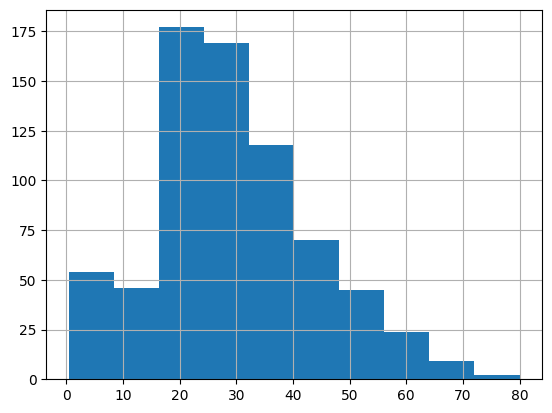

In [58]:
# Plot a histogram of the 'Age' column
age_series = df['age']
age_series.hist()

### Part 3: Data Manipulation


### 1. Assigning a Scalar Value
If you want every row in the new column to have the same value, you can assign a scalar value directly to a new column name. This is useful for initializing a column or marking data with a constant.

```python
import pandas as pd

# Create a simple DataFrame
df = pd.DataFrame({
    'A': range(1, 6),
    'B': ['a', 'b', 'c', 'd', 'e']
})

# Adding a new column with a scalar value
df['C'] = 10

print(df)
```

In [4]:
# Adding a new column


import pandas as pd

# Create a simple DataFrame
df = pd.DataFrame({
    'A' : range(1 ,6),
    'B' : ['a','b','c','d','e']

})
# Adding a new column with a scalar value
df['C'] = 10

print(df)


   A  B   C
0  1  a  10
1  2  b  10
2  3  c  10
3  4  d  10
4  5  e  10


### 2. Using an Existing Column
You can create a new column by performing operations on an existing column. This can involve arithmetic operations, string methods, or more complex functions.

```python
# Creating a new column by manipulati                                       ng an existing column
df['A_squared'] = df['A'] ** 2

# Using a string method
df['B_upper'] = df['B'].str.upper()

print(df)
```

In [13]:
# Creating a new column by manipulating an existing column
df['A_squared'] = df['A'] ** 2

# Using a string method
df['B_upper'] = df['B'].str.upper()

print(df)

   A  B   C  A_squared B_upper Categorys
0  1  a  10          1       A       low
1  2  b  10          4       B       low
2  3  c  10          9       C    medium
3  4  d  10         16       D    medium
4  5  e  10         25       E      high


### 3. Using a Function
You can apply a function to an existing column to create a new column using the `.apply()` method. This is very flexible and can be used for more complex data manipulations.

```python
# Define a simple function to categorize data
def categorize(x):
    if x < 3:
        return 'Low'
    elif x < 5:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new column
df['Category'] = df['A'].apply(categorize)

print(df)
```

In [10]:
def  catergory(x):
  if x < 3:
   return 'low'
  elif x < 5:
    return 'medium'
  else:
    return  'high'

df['Categorys'] = df['A'].apply(catergory)
print(df)

   A  B   C  A_squared B_upper Categorys
0  1  a  10          1       A       low
1  2  b  10          4       B       low
2  3  c  10          9       C    medium
3  4  d  10         16       D    medium
4  5  e  10         25       E      high


### 4. Using `assign` Method
The `.assign()` method allows you to create new columns while leaving the original DataFrame untouched, thus following the functional programming paradigms.

```python
# Using assign to create a new column
new_df = df.assign(A_log=df['A'].apply(lambda x: np.log(x)))

print(new_df)
```

In [14]:

import numpy as np

new_df = df.assign(a_log=df['A'].apply(lambda x : np.log(x)))
print(new_df)

   A  B   C  A_squared B_upper Categorys     a_log
0  1  a  10          1       A       low  0.000000
1  2  b  10          4       B       low  0.693147
2  3  c  10          9       C    medium  1.098612
3  4  d  10         16       D    medium  1.386294
4  5  e  10         25       E      high  1.609438


### 5. Using Conditions
You can use conditions to create new columns, for example, by using NumPy's `where` function or pandas' own conditional constructs.

```python
import numpy as np

# Create a new column based on a condition
df['Is_A_Large'] = np.where(df['A'] > 3, 'Yes', 'No')

print(df)
```

In [ ]:
import numpy as np

# Create a new column based on a condition
df['Is_A_Large'] = np.where(df['A'] > 3, 'Yes', 'No')

print(df)

In [16]:
df['large'] = np.where(df['A'] > 3 ,'yes' ,'no')
print(df)

   A  B   C  A_squared B_upper Categorys large
0  1  a  10          1       A       low    no
1  2  b  10          4       B       low    no
2  3  c  10          9       C    medium    no
3  4  d  10         16       D    medium   yes
4  5  e  10         25       E      high   yes



### 6. Copying Values from Other Columns
Sometimes, you may want to create a new column that starts as a copy of an existing column, which you can then modify independently of the original.

```python
# Copying a column
df['A_copy'] = df['A']

# Now modify the new column without changing the original
df['A_copy'] += 5

print(df)
```

These methods cover most use cases you might encounter when adding new columns to a DataFrame in pandas. Whether you’re initializing with constants, deriving from existing data, or applying functions for complex transformations, pandas offers a robust set of tools for column creation.

In [18]:
df['A_copy'] = df['A']

df['A_copy'] += 5

print(df)

   A  B   C  A_squared B_upper Categorys large df_copy  A_copy
0  1  a  10          1       A       low    no       a       6
1  2  b  10          4       B       low    no       b       7
2  3  c  10          9       C    medium    no       c       8
3  4  d  10         16       D    medium   yes       d       9
4  5  e  10         25       E      high   yes       e      10


### Using `drop()` Method

The primary method for dropping columns in pandas is the `drop()` method. Here’s how to use it:

#### Syntax to Drop a Single Column:
```python
import pandas as pd

# Assuming 'df' is your DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})

# Drop a single column by name
df = df.drop('B', axis=1)  # Remember to specify axis=1 for columns
```

#### Syntax to Drop Multiple Columns:
```python
# Drop multiple columns by name
df = df.drop(['A', 'C'], axis=1)
```

### Parameters:
- **labels**: Column or list of columns you want to drop.
- **axis**: Needs to be set to `1` to indicate dropping columns (setting it to `0` would drop rows).
- **inplace**: If `True`, it modifies the DataFrame in place (does not return anything). If `False`, it returns a new DataFrame.




In [27]:
# Removing a column

df_drop = pd.DataFrame({'A' : [1,2,3],
                        'B' : [4,5,6],
                        'C' : [7,8,9]})

df_drop_col = df_drop.drop('A',  axis=1)
df_mul_col = df_drop.drop(['B' ,'C'] , axis=1)
print(df_drop_col)
print(df_mul_col)



   B  C
0  4  7
1  5  8
2  6  9
   A
0  1
1  2
2  3


### Using `inplace=True`
If you prefer to modify the DataFrame in place without reassigning it (to save memory or just for convenience), you can use the `inplace=True` parameter:

```python
# Dropping in place
df.drop('B', axis=1, inplace=True)
```

### Dropping Columns Using Column Names
If you have the names of the columns stored in a variable (perhaps dynamically generated), you can drop those as well:

```python
# List of columns to drop
cols_to_drop = ['A', 'C']

# Drop columns using a variable
df.drop(cols_to_drop, axis=1, inplace=True)
```



### Using `del` Keyword
Python's `del` keyword can also be used to remove a column from a DataFrame. This method modifies the DataFrame in place:

```python
# Remove a column using del
del df['B']
```

### Using `pop()` Method
The `pop()` method not only removes the column but also returns it as a Series. This can be useful if you want to use the column for further operations:

```python
# Pop a column and save it to a variable
popped_column = df.pop('B')
```

In [28]:
popped_column = df.pop('B')
print(df)

   A   C  A_squared B_upper Categorys large df_copy  A_copy
0  1  10          1       A       low    no       a       6
1  2  10          4       B       low    no       b       7
2  3  10          9       C    medium    no       c       8
3  4  10         16       D    medium   yes       d       9
4  5  10         25       E      high   yes       e      10


### Type Conversion

### Handling Missing Values

### Data Transformation

### Feature Engineering

In [ ]:
Series3=({'London': 20, 'Tripoli':89, 'Cairo':90})

print(Series3)

{'London': 20, 'Tripoli': 89, 'Cairo': 90}


In [ ]:
import pandas as pd
my_serie = pd.Series(Series3)
my_serie

London     20
Tripoli    89
Cairo      90
dtype: int64

In [ ]:
my_serie['London']

20

In [ ]:
my_serie[my_serie.values > 20]

Tripoli    89
Cairo      90
dtype: int64